## MMAI869 Dr. Stephen Thomas

### Individual Assignment, Question 1
### Francis Bello
### 20141658

# How Lovely!

In [1]:
import datetime
print(datetime.datetime.now())

2019-11-08 19:36:35.183610


#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer,InterclusterDistance

In [3]:
%matplotlib inline

#### Read data

In [4]:
jewelry_cust = pd.read_csv('jewelry_customers.csv')

#### Inspect data

In [5]:
features = list(jewelry_cust) #check features
features

['Age', 'Income', 'SpendingScore', 'Savings']

In [6]:
jewelry_cust.shape #check dimension size

(505, 4)

In [7]:
jewelry_cust.head(5) #check top 5

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130


In [8]:
jewelry_cust.tail(5) #check bottom 5

,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


In [9]:
jewelry_cust.info() #check data types and record count per feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [10]:
jewelry_cust.describe() #check statistics values 

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [11]:
#normalize the dataset
scaler = StandardScaler()
jewelry_cust_standard = jewelry_cust
jewelry_cust_standard[features] = scaler.fit_transform(jewelry_cust[features])

In [12]:
jewelry_cust_standard.describe() #check normalized statistics values 

,Age,Income,SpendingScore,Savings
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00


In [13]:
pandas_profiling.ProfileReport(jewelry_cust_standard, check_correlation=False) #check profile of each feature

Number of variables,4
Number of observations,505
Total Missing (%),0.0%
Total size in memory,15.9 KiB
Average record size in memory,32.2 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


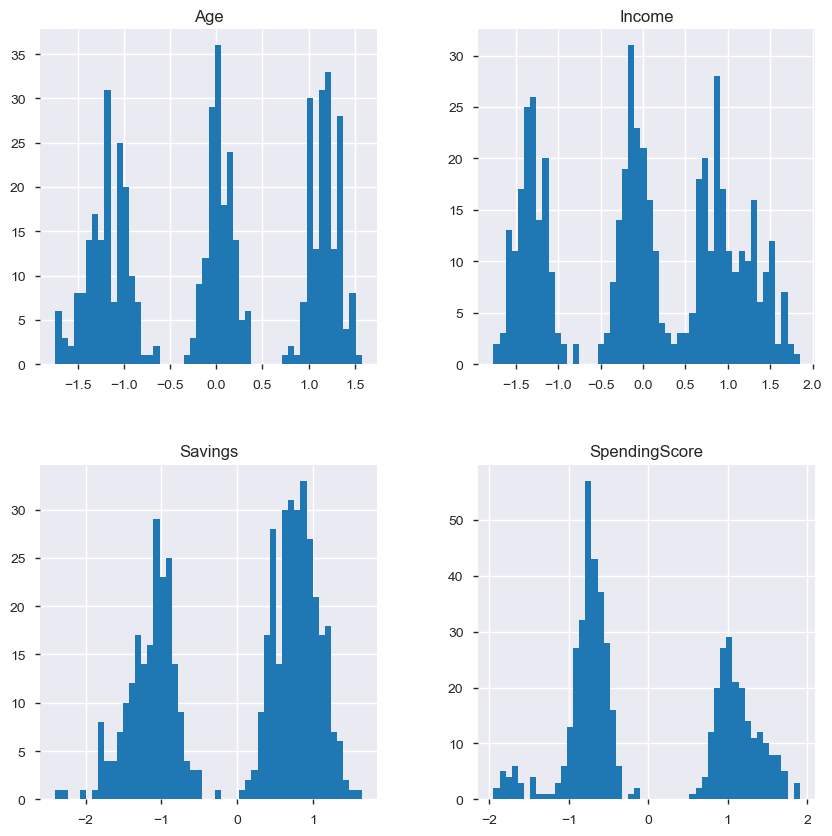

In [14]:
jewelry_cust_standard.hist(bins=50,figsize=(10,10)) #check histogram
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027B6A75E4E0>,
      dtype=object)

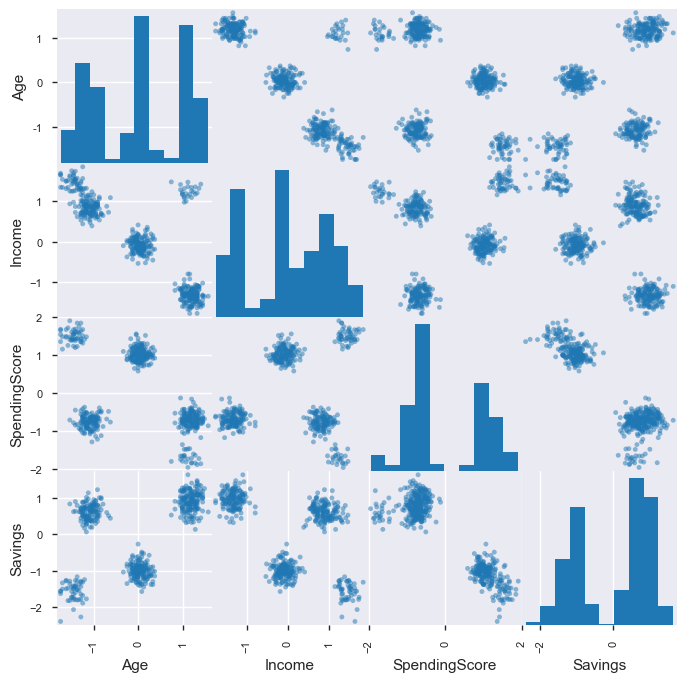

In [15]:
#check scatter matrix
attributes = list(jewelry_cust_standard)
scatter_matrix(jewelry_cust_standard[attributes], figsize=(8,8))

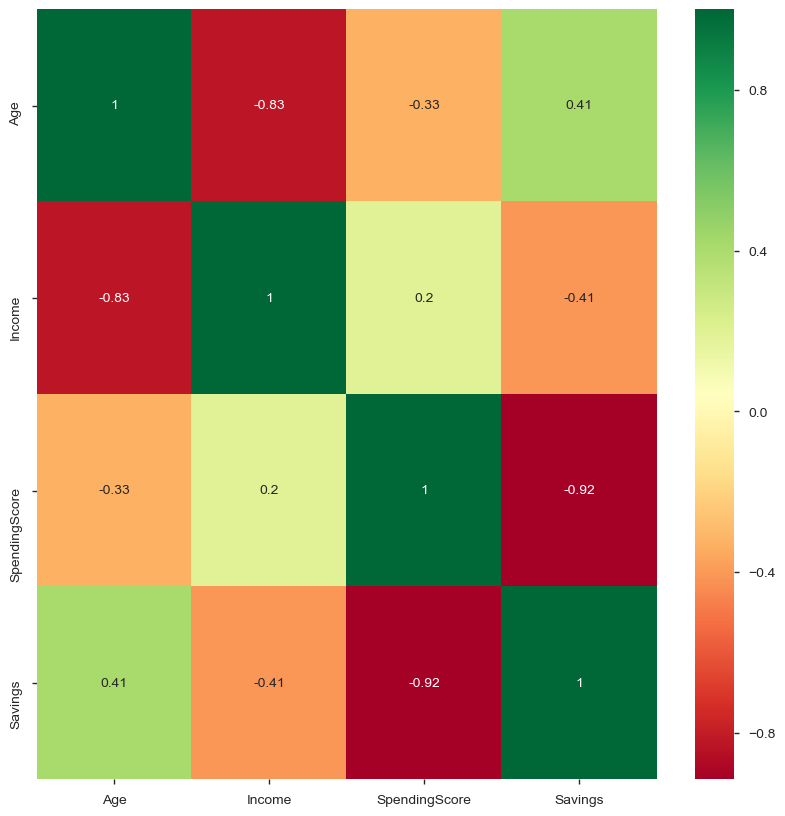

In [16]:
#show different view of correlation
corrmat = jewelry_cust.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(jewelry_cust[top_corr_features].corr(),annot=True,cmap='RdYlGn')

Text(0, 0.5, 'Inertia')

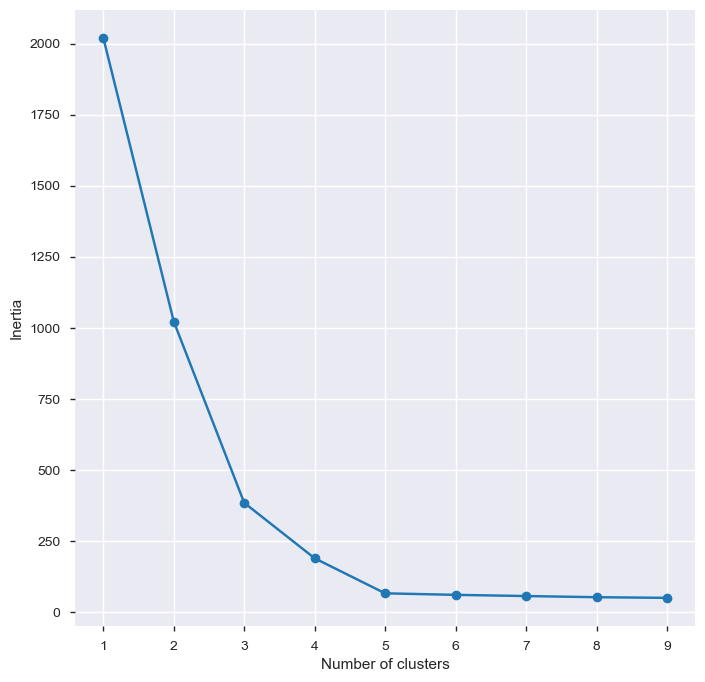

In [17]:
#plot an elbow graph to determine optimal value for K
inertia_arr = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init=10,random_state=42)
    kmeans.fit(jewelry_cust_standard)
    inertia_arr.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':inertia_arr})
plt.figure(figsize=(8,8))
plt.grid(True);
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Text(0, 0.5, 'Silhouette')

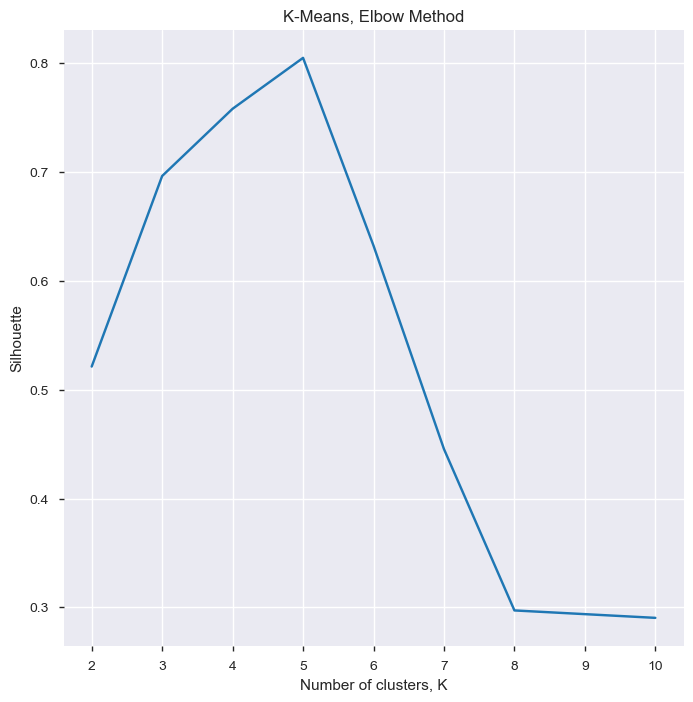

In [18]:
#plot different elbow graph to determine optimal value for K
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(jewelry_cust_standard)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(jewelry_cust_standard, kmeans.labels_, metric='euclidean')
    
plt.figure(figsize=(8,8));
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette")    

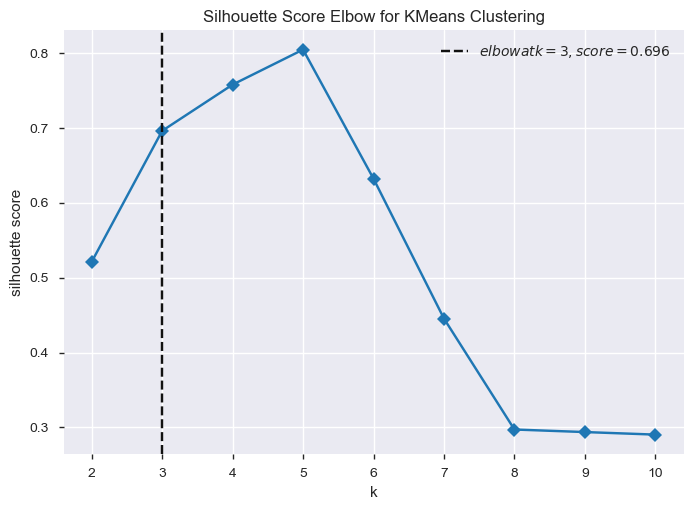

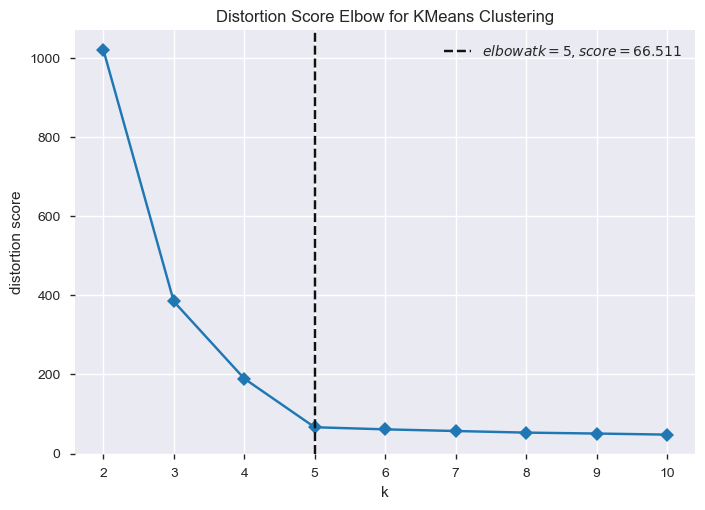

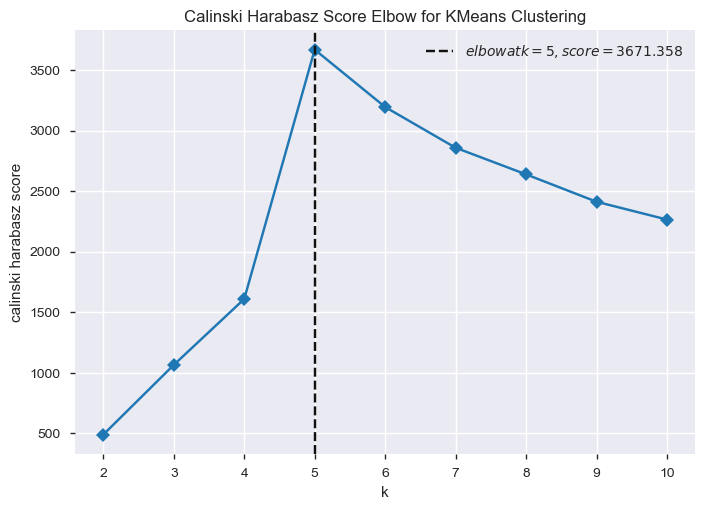

In [19]:
#plot more elbow graphs to determine optimal value for K
model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False).fit(jewelry_cust_standard).poof()
KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(jewelry_cust_standard).poof()
KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False).fit(jewelry_cust_standard).poof();

In [20]:
#assign to another object to preserve orig dataframe
kmeans_arr = jewelry_cust_standard 

Cluster count: 2
Centers
[[-0.61035919  0.49218984  0.42642224 -0.47300618]
 [ 1.18168379 -0.95290242 -0.82557329  0.91576197]]
Inertia: 1022.3905044613807
Silhouette score: 0.5212589967674504
Cluster Assignments:
[0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 0 0 0
 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1

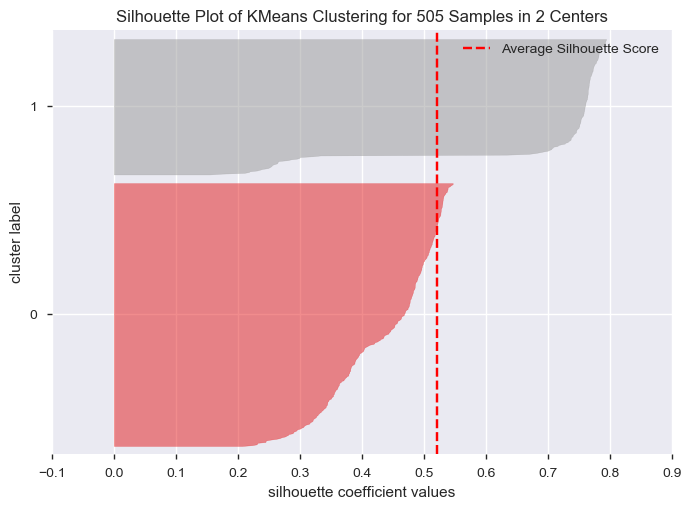


Cluster count: 3
Centers
[[-0.72276928  0.89502598 -0.90658925  0.62188649]
 [-0.31952856  0.28812391  1.14397016 -1.14260341]
 [ 1.19238486 -1.32510593 -0.67963841  0.97016358]]
Inertia: 384.8111859304379
Silhouette score: 0.6963481945884472
Cluster Assignments:
[1 1 1 1 2 1 1 2 2 2 0 0 0 0 1 0 1 2 2 0 0 0 1 2 0 1 1 1 2 1 1 1 2 1 0 1 2
 1 0 0 1 2 1 1 1 1 0 1 0 1 2 0 1 2 1 2 0 2 2 2 2 2 2 1 1 1 2 1 1 1 1 0 2 2
 0 1 0 1 1 1 1 0 1 2 2 0 0 1 1 1 1 1 1 2 1 1 0 1 1 0 0 1 0 1 0 2 2 0 0 1 2
 0 1 0 0 0 1 0 1 2 0 2 2 2 0 0 1 2 1 1 0 1 0 1 1 2 0 1 1 0 2 1 1 1 1 1 1 0
 1 2 1 0 2 1 2 0 0 1 2 1 0 2 1 0 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2 1 1 0 1 1
 2 0 1 1 1 0 2 1 1 1 2 1 0 2 2 2 0 1 0 1 0 1 2 1 1 2 2 2 2 1 2 0 1 0 2 1 1
 0 2 0 1 0 1 1 2 1 1 2 1 1 1 0 1 0 0 1 1 1 1 0 1 0 2 1 1 1 2 1 0 2 2 0 0 1
 1 0 1 1 2 1 2 0 1 1 0 2 1 2 2 0 1 2 2 1 1 2 0 0 0 0 2 2 0 0 2 2 1 1 0 0 1
 0 2 2 0 1 0 2 1 0 1 1 2 0 0 2 0 0 1 2 0 1 1 2 0 2 0 2 0 2 2 0 2 0 1 0 1 1
 0 0 2 2 1 1 0 2 1 2 0 1 1 1 2 2 0 0 0 0 0 1 0 1 2 1 2 1 1 2

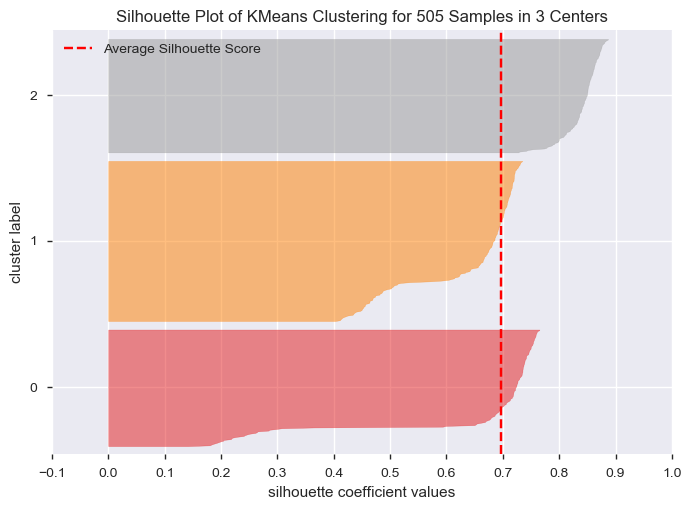


Cluster count: 4
Centers
[[-0.72276928  0.89502598 -0.90658925  0.62188649]
 [ 0.03879611 -0.08524639  1.02721559 -1.00569483]
 [ 1.19238486 -1.32510593 -0.67963841  0.97016358]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]]
Inertia: 189.70178796659562
Silhouette score: 0.7581191889903789
Cluster Assignments:
[1 1 1 1 2 3 1 2 2 2 0 0 0 0 1 0 1 2 2 0 0 0 1 2 0 3 3 1 2 1 1 1 2 1 0 1 2
 1 0 0 1 2 3 1 1 3 0 3 0 1 2 0 3 2 1 2 0 2 2 2 2 2 2 1 1 1 2 3 3 1 1 0 2 2
 0 1 0 1 1 3 1 0 1 2 2 0 0 1 1 1 1 1 3 2 1 3 0 1 1 0 0 3 0 3 0 2 2 0 0 1 2
 0 1 0 0 0 1 0 3 2 0 2 2 2 0 0 1 2 1 1 0 1 0 1 3 2 0 3 1 0 2 1 1 3 1 3 1 0
 1 2 1 0 2 1 2 0 0 1 2 1 0 2 1 0 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2 1 1 0 3 3
 2 0 1 1 1 0 2 1 1 1 2 3 0 2 2 2 0 1 0 1 0 1 2 3 1 2 2 2 2 1 2 0 3 0 2 1 1
 0 2 0 3 0 1 1 2 1 1 2 1 1 1 0 1 0 0 3 1 1 1 0 1 0 2 3 3 3 2 1 0 2 2 0 0 1
 1 0 1 1 2 1 2 0 3 1 0 2 1 2 2 0 1 2 2 1 1 2 0 0 0 0 2 2 0 0 2 2 3 1 0 0 1
 0 2 2 0 1 0 2 1 0 3 1 2 0 0 2 0 0 1 2 0 1 1 2 0 2 0 2 0 2 2 0 2 0 1 0 1 1
 0 0 2 2

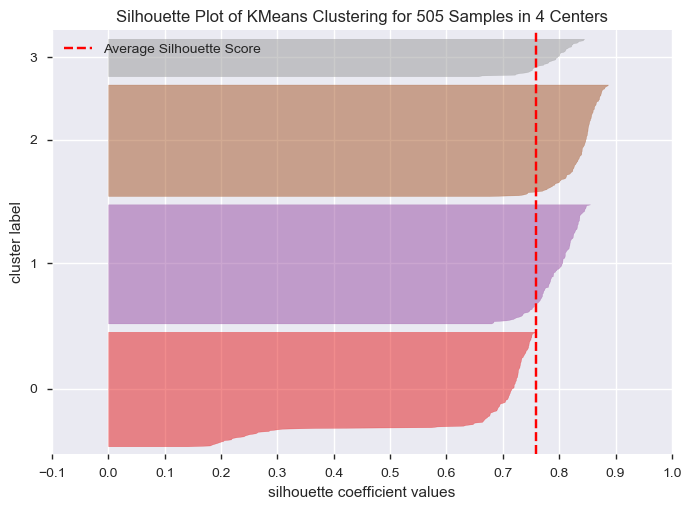


Cluster count: 5
Centers
[[-1.08815238  0.82744102 -0.75240648  0.6270464 ]
 [ 0.03879611 -0.08524639  1.02721559 -1.00569483]
 [ 1.19238486 -1.32510593 -0.67963841  0.97016358]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]]
Inertia: 66.5111137485908
Silhouette score: 0.8048976287755765
Cluster Assignments:
[1 1 1 1 2 3 1 2 2 2 4 0 0 0 1 4 1 2 2 4 0 4 1 2 4 3 3 1 2 1 1 1 2 1 0 1 2
 1 0 0 1 2 3 1 1 3 4 3 0 1 2 0 3 2 1 2 0 2 2 2 2 2 2 1 1 1 2 3 3 1 1 0 2 2
 0 1 0 1 1 3 1 4 1 2 2 0 0 1 1 1 1 1 3 2 1 3 0 1 1 0 0 3 0 3 0 2 2 0 0 1 2
 0 1 0 0 0 1 0 3 2 0 2 2 2 0 4 1 2 1 1 0 1 0 1 3 2 4 3 1 0 2 1 1 3 1 3 1 4
 1 2 1 0 2 1 2 4 0 1 2 1 0 2 1 0 2 0 2 1 0 1 2 1 0 1 2 1 1 2 2 2 1 1 0 3 3
 2 0 1 1 1 0 2 1 1 1 2 3 0 2 2 2 0 1 0 1 0 1 2 3 1 2 2 2 2 1 2 0 3 0 2 1 1
 0 2 0 3 0 1 1 2 1 1 2 1 1 1 0 1 0 0 3 1 1 1 4 1 0 2 3 3 3 2 1 0 2 2 0 0 1
 1 4 1 1 2 1 2 0 3 1 0 2 1 2 2 0 1 2 2 1 1 2 0 0 4 0 2 2 0 4 2 2 3 1 0 0 1
 0 2 2 0 1 0 2 1 0 3 1 2 0 0 2 4 4

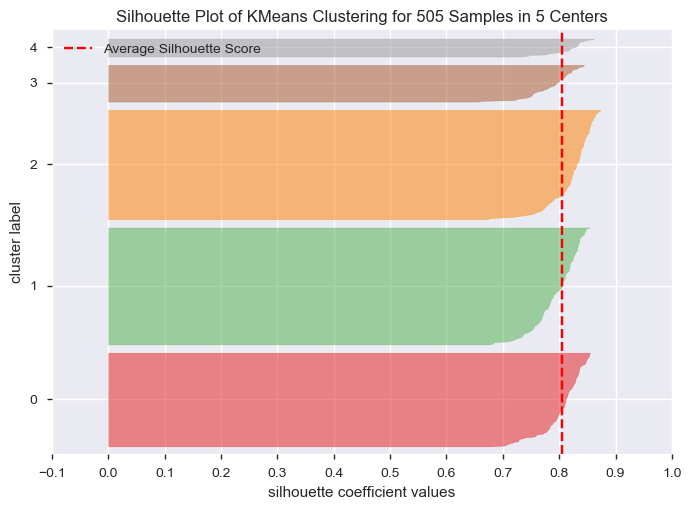


Cluster count: 6
Centers
[[ 0.03879611 -0.08524639  1.02721559 -1.00569483]
 [ 1.15767578 -1.28820856 -0.70159946  0.7628309 ]
 [-1.08815238  0.82744102 -0.75240648  0.6270464 ]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]
 [ 1.21989815 -1.35435385 -0.66223026  1.13451265]]
Inertia: 61.14688293497977
Silhouette score: 0.6323567916608213
Cluster Assignments:
[0 0 0 0 5 3 0 5 1 5 4 2 2 2 0 4 0 1 5 4 2 4 0 1 4 3 3 0 5 0 0 0 5 0 2 0 5
 0 2 2 0 5 3 0 0 3 4 3 2 0 5 2 3 1 0 5 2 5 1 1 1 5 5 0 0 0 5 3 3 0 0 2 1 5
 2 0 2 0 0 3 0 4 0 1 1 2 2 0 0 0 0 0 3 5 0 3 2 0 0 2 2 3 2 3 2 1 1 2 2 0 1
 2 0 2 2 2 0 2 3 5 2 5 1 1 2 4 0 5 0 0 2 0 2 0 3 5 4 3 0 2 1 0 0 3 0 3 0 4
 0 1 0 2 1 0 5 4 2 0 5 0 2 1 0 2 5 2 1 0 2 0 5 0 2 0 5 0 0 5 5 5 0 0 2 3 3
 1 2 0 0 0 2 5 0 0 0 1 3 2 1 1 5 2 0 2 0 2 0 5 3 0 5 5 1 1 0 1 2 3 2 5 0 0
 2 5 2 3 2 0 0 5 0 0 5 0 0 0 2 0 2 2 3 0 0 0 4 0 2 5 3 3 3 1 0 2 5 1 2 2 0
 0 4 0 0 5 0 1 2 3 0 2 5 0 5 5 2 0 5 1 0 0 5 2 2 4 2 1 5 

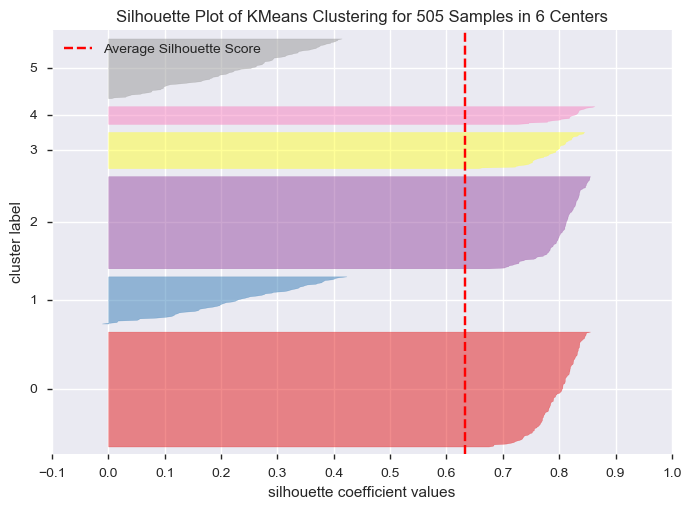


Cluster count: 7
Centers
[[-1.08815238  0.82744102 -0.75240648  0.6270464 ]
 [ 0.08068107 -0.1492085   0.96315051 -1.11284481]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.21133682 -1.34241322 -0.65585649  1.12732022]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]
 [ 1.1656657  -1.30070549 -0.71316702  0.74859848]
 [-0.01326092 -0.00575063  1.10683932 -0.8725227 ]]
Inertia: 56.95698845685121
Silhouette score: 0.44545525411665643
Cluster Assignments:
[6 1 6 6 3 2 6 3 5 3 4 0 0 0 6 4 6 5 3 4 0 4 1 5 4 2 2 6 3 6 1 1 3 6 0 1 3
 6 0 0 6 3 2 1 6 2 4 2 0 6 3 0 2 5 1 3 0 3 5 5 5 3 3 1 1 1 3 2 2 6 6 0 5 3
 0 6 0 1 6 2 6 4 6 5 5 0 0 1 6 6 6 1 2 3 1 2 0 1 1 0 0 2 0 2 0 3 5 0 0 6 5
 0 1 0 0 0 1 0 2 3 0 3 5 5 0 4 6 3 1 1 0 6 0 1 2 3 4 2 1 0 3 1 6 2 6 2 1 4
 1 5 1 0 5 1 3 4 0 1 3 6 0 5 1 0 3 0 5 1 0 1 3 6 0 6 3 6 1 3 3 3 1 6 0 2 2
 5 0 1 6 1 0 3 1 6 6 3 2 0 5 5 3 0 6 0 6 0 6 3 2 1 3 3 5 5 6 5 0 2 0 3 6 1
 0 3 0 2 0 1 6 3 1 1 3 1 1 1 0 1 0 0 2 1 1 1 4 1 0 3 2 2 2 5 1 0 3 3 0 0 1
 1 4 

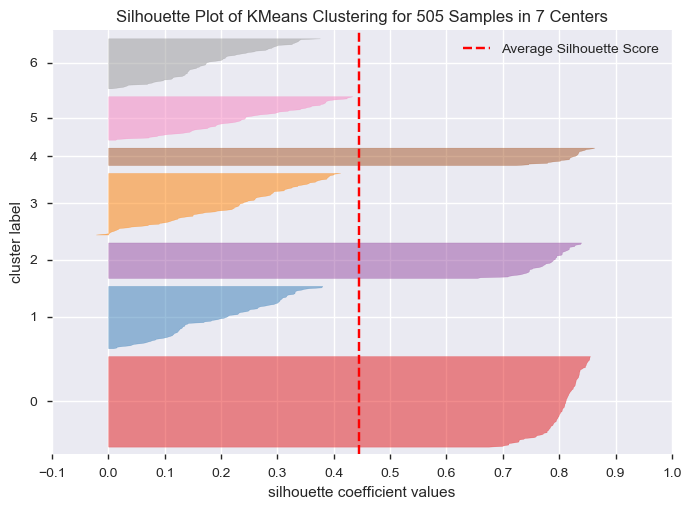


Cluster count: 8
Centers
[[ 0.01002385 -0.11240048  1.03869278 -0.8132079 ]
 [ 1.1759963  -1.3256078  -0.6967374   0.77410112]
 [-1.09189584  0.88325822 -0.74018445  0.46197227]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]
 [ 0.05912434 -0.06606144  1.0191067  -1.14169103]
 [-1.08428816  0.76982326 -0.76502276  0.7974455 ]
 [ 1.20769522 -1.32463708 -0.66366435  1.15332719]]
Inertia: 52.886292892241144
Silhouette score: 0.2971767053193914
Cluster Assignments:
[5 5 0 0 7 3 5 7 1 7 4 6 2 2 0 4 0 1 7 4 2 4 5 1 4 3 3 0 7 0 0 0 7 0 6 5 7
 0 6 2 0 7 3 5 0 3 4 3 6 5 7 6 3 1 0 7 6 7 1 1 1 7 7 5 0 5 7 3 3 0 0 2 1 7
 2 5 6 5 0 3 0 4 5 1 1 6 2 5 0 5 0 5 3 7 5 3 6 5 5 6 2 3 6 3 6 1 1 2 2 5 1
 6 5 6 2 2 5 2 3 7 6 7 1 1 6 4 5 7 5 0 6 0 2 5 3 7 4 3 0 6 7 5 0 3 0 3 5 4
 0 1 5 2 1 5 1 4 2 5 7 0 6 1 5 2 7 6 1 5 6 5 7 0 2 0 7 5 5 7 7 7 5 5 2 3 3
 1 6 0 0 5 6 7 5 0 0 7 3 2 1 1 7 6 5 6 5 6 0 7 3 0 7 7 1 1 0 1 2 3 2 7 5 5
 6 7 2 3 2 5 0 7 5 5 7 5 5 5 

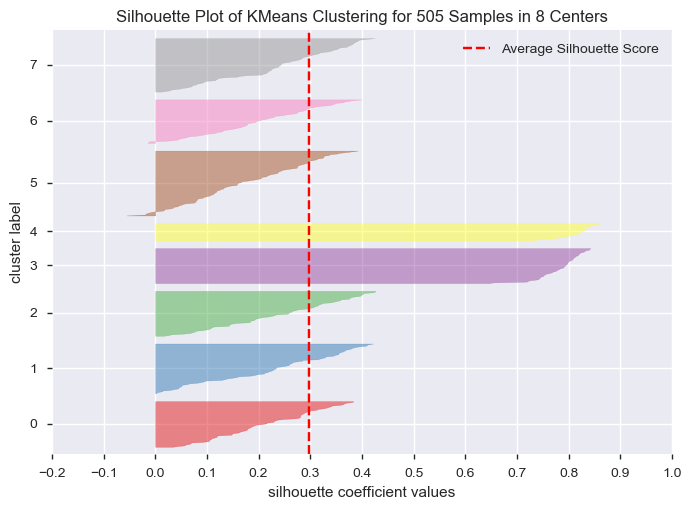


Cluster count: 9
Centers
[[ 1.20915744 -1.37572663 -0.74282553  1.20588661]
 [-0.01326092 -0.00575063  1.10683932 -0.8725227 ]
 [-1.08978267  0.77969262 -0.76503963  0.79184312]
 [-1.44466803  1.46050665  1.51057952 -1.57249636]
 [ 1.11876151  1.23565419 -1.68367042  0.59588052]
 [ 1.19588831 -1.3915265  -0.75094689  0.74802388]
 [ 0.08068107 -0.1492085   0.96315051 -1.11284481]
 [-1.08641519  0.87832046 -0.73894492  0.45144334]
 [ 1.1708146  -1.20059395 -0.53655798  0.95571323]]
Inertia: 50.56979113010807
Silhouette score: 0.29377143436223707
Cluster Assignments:
[1 6 1 1 0 3 1 8 5 0 4 2 7 7 1 4 1 8 8 4 7 4 6 5 4 3 3 1 8 1 6 6 0 1 2 6 8
 1 2 7 1 0 3 6 1 3 4 3 2 1 0 2 3 5 6 0 2 0 5 5 5 0 0 6 6 6 0 3 3 1 1 7 8 0
 7 1 2 6 1 3 1 4 1 8 8 2 7 6 1 1 1 6 3 8 6 3 2 6 6 2 2 3 2 3 2 8 5 7 7 1 8
 2 6 2 7 7 6 7 3 0 2 0 8 8 2 4 1 0 6 6 2 1 7 6 3 0 4 3 6 2 8 6 1 3 1 3 6 4
 6 5 6 7 8 6 5 4 7 6 0 1 2 8 6 7 8 2 8 6 2 6 0 1 7 1 8 1 6 0 8 0 6 1 7 3 3
 5 2 6 1 6 2 0 6 1 1 8 3 7 5 5 0 2 1 2 1 2 1 0 3 6 0 

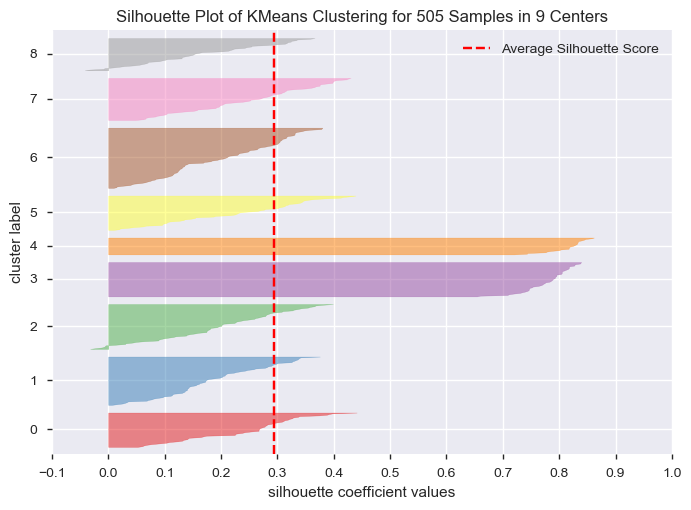

In [21]:
#iterate through different K values (2 to 9) to find optimal value (visual aid as well)
#display the centers/inertia/silhouette score/mapping of each instance to cluster/silhouette graph for each cluster iteration, 
for cluster_ctr in range(2,10):
    kmeans = KMeans(n_clusters=cluster_ctr,n_init=10,random_state=42)
    cluster = kmeans.fit(kmeans_arr)
    print("Cluster count:", cluster_ctr)
    print ("Centers")
    print(kmeans.cluster_centers_)
    print("Inertia: {0}".format(str(kmeans.inertia_)))
    #print(kmeans.inertia_)
    print("Silhouette score: {0}".format(str(silhouette_score(jewelry_cust_standard, kmeans.labels_))))
    print("Cluster Assignments:")
    print(kmeans.labels_)
    visualizer = SilhouetteVisualizer(kmeans)
    visualizer.fit(jewelry_cust_standard)
    visualizer.poof()   
    print("")

#### K=5 resulted as the  optimal value, display clusters & centroids, centers, feature-cluster mapping

In [22]:
cluster_count = 5
kmeans = KMeans(n_clusters=cluster_count,n_init=10,random_state=42) #try a cluster value
kmeans.fit(kmeans_arr)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [23]:
kmeans.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [24]:
kmeans.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

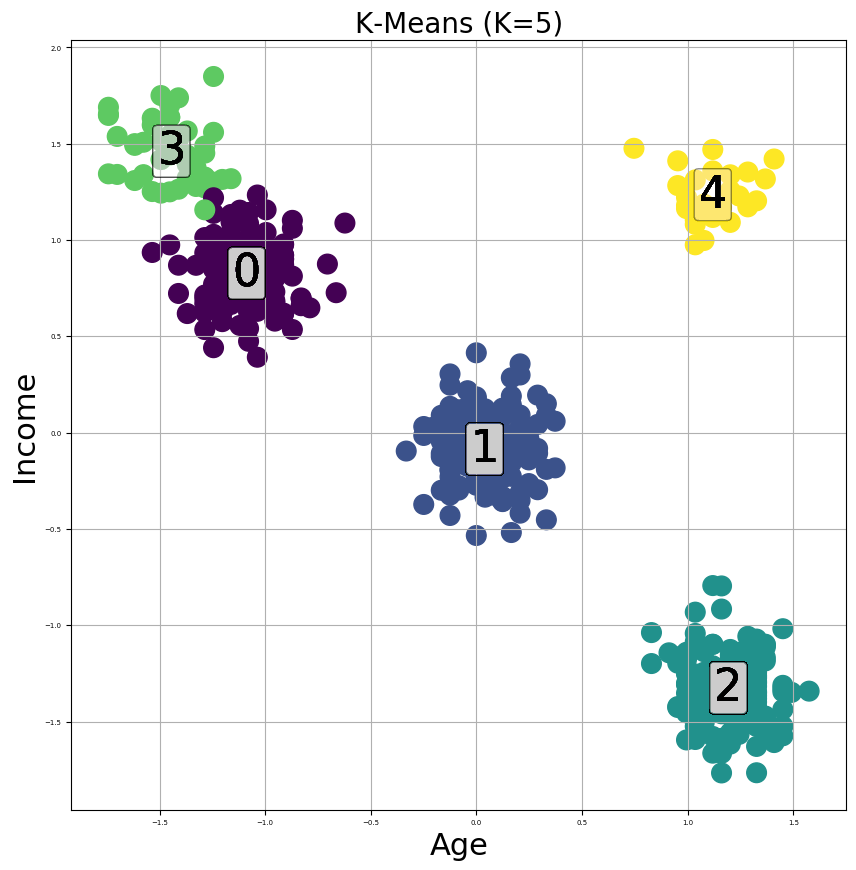

In [25]:
plt.style.use('default');

plt.figure(figsize=(10, 10));
plt.grid(True);

sc = plt.scatter(kmeans_arr.iloc[:, 0], kmeans_arr.iloc[:, 1], s=200, c=kmeans.labels_);
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=5);
plt.yticks(fontsize=5);

for label in kmeans.labels_:
    plt.text(x=kmeans.cluster_centers_[label, 0], y=kmeans.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

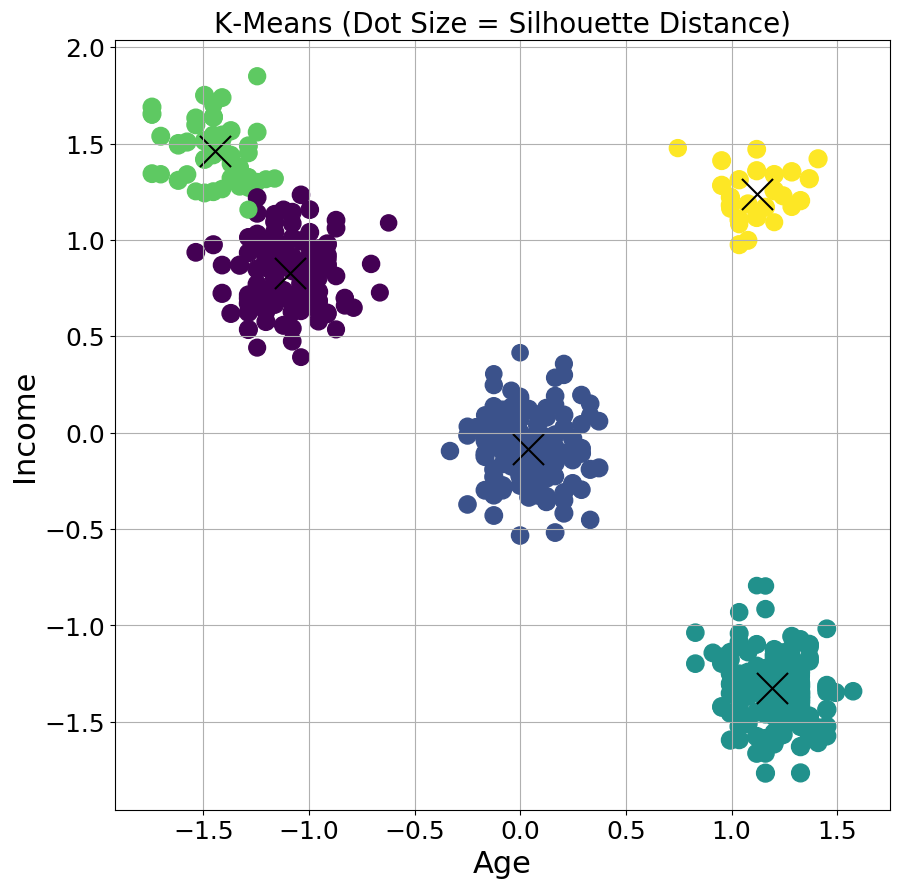

In [26]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(kmeans_arr, kmeans.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(10, 10));
plt.grid(True);

plt.scatter(kmeans_arr.iloc[:, 0], kmeans_arr.iloc[:, 1], s=sizes, c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Age', fontsize=22);
plt.ylabel('Income', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

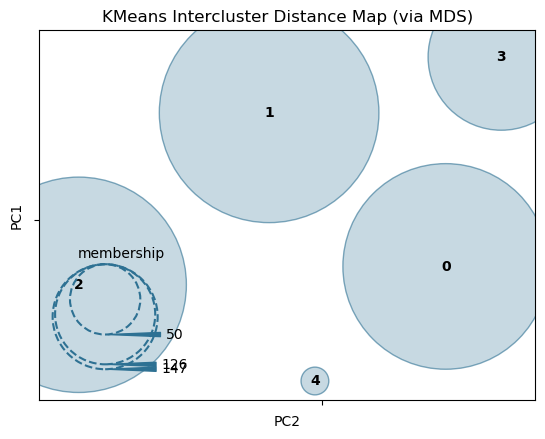

In [27]:
visualizer = InterclusterDistance(kmeans)

visualizer.fit(kmeans_arr)
visualizer.poof() 

#### Visually check all clusters one at a time (cluster count from 2 to 9)

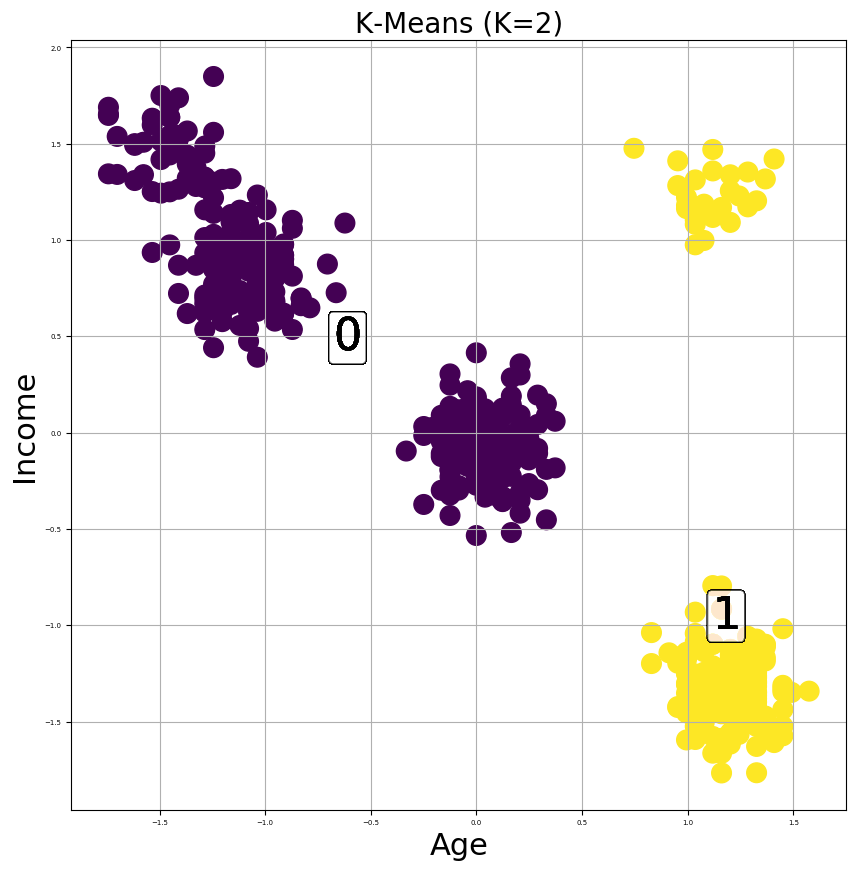

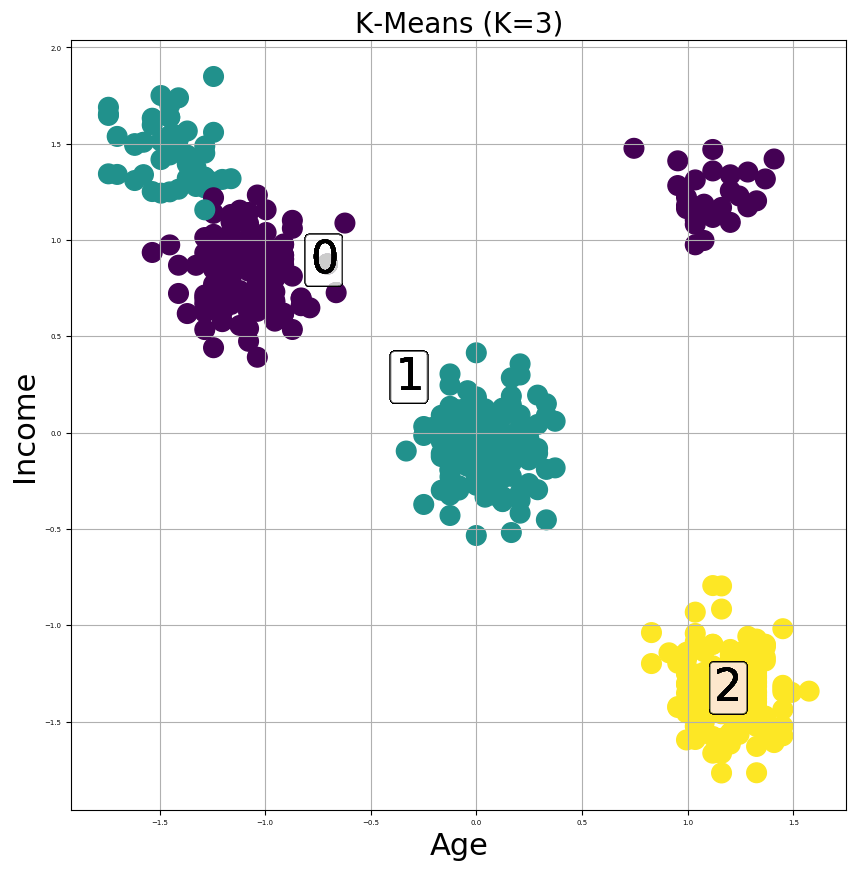

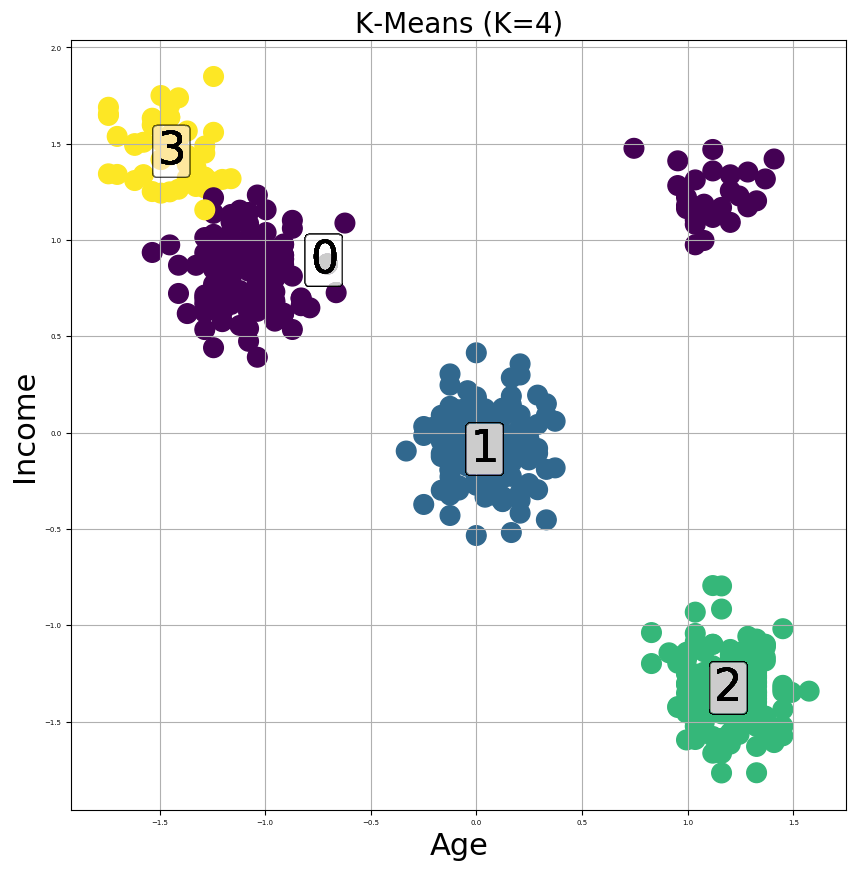

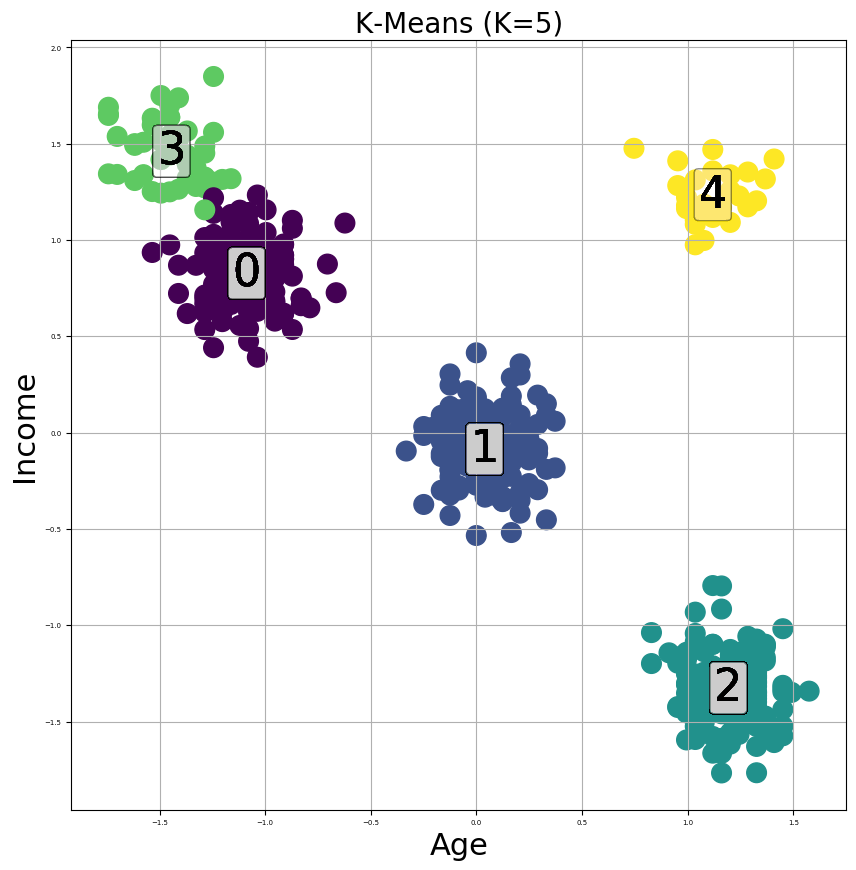

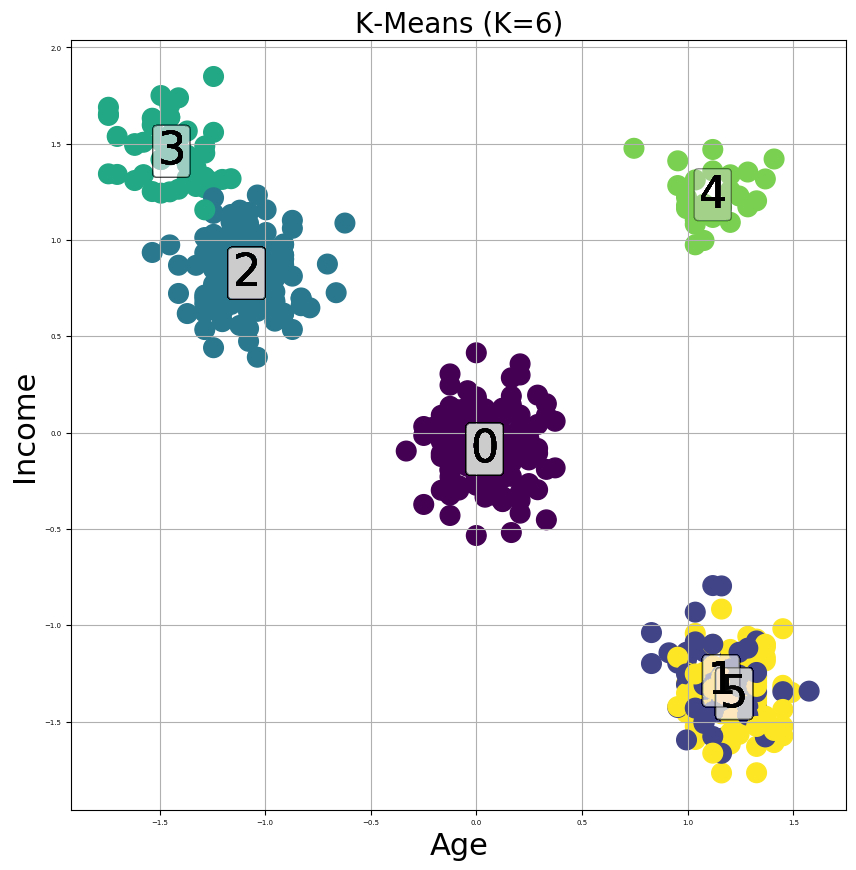

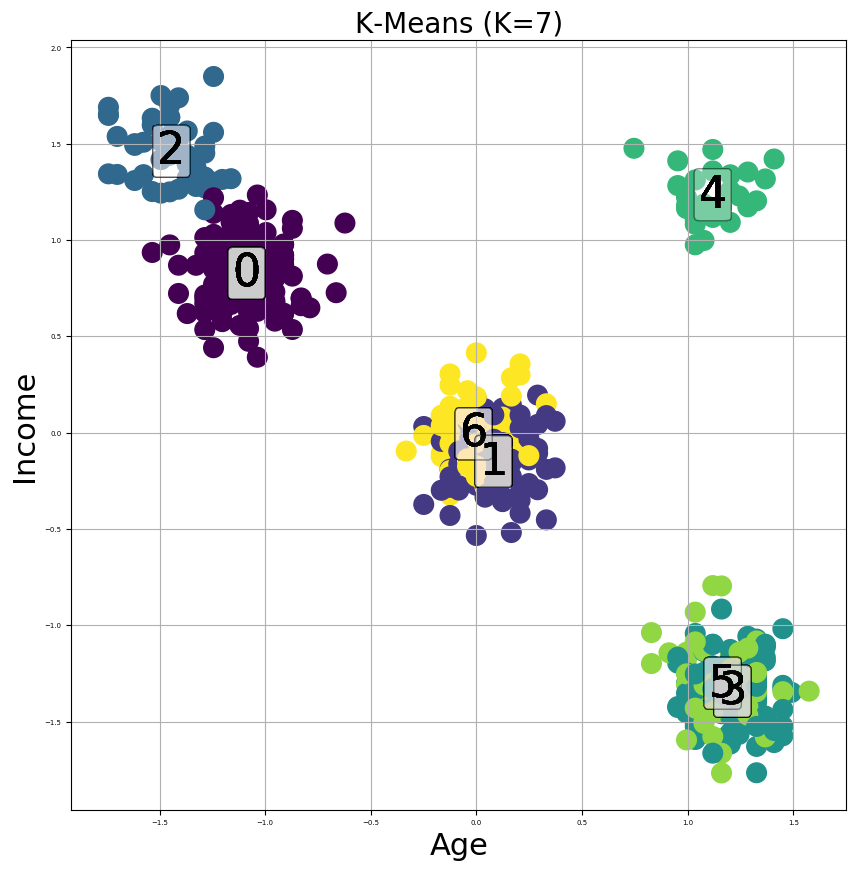

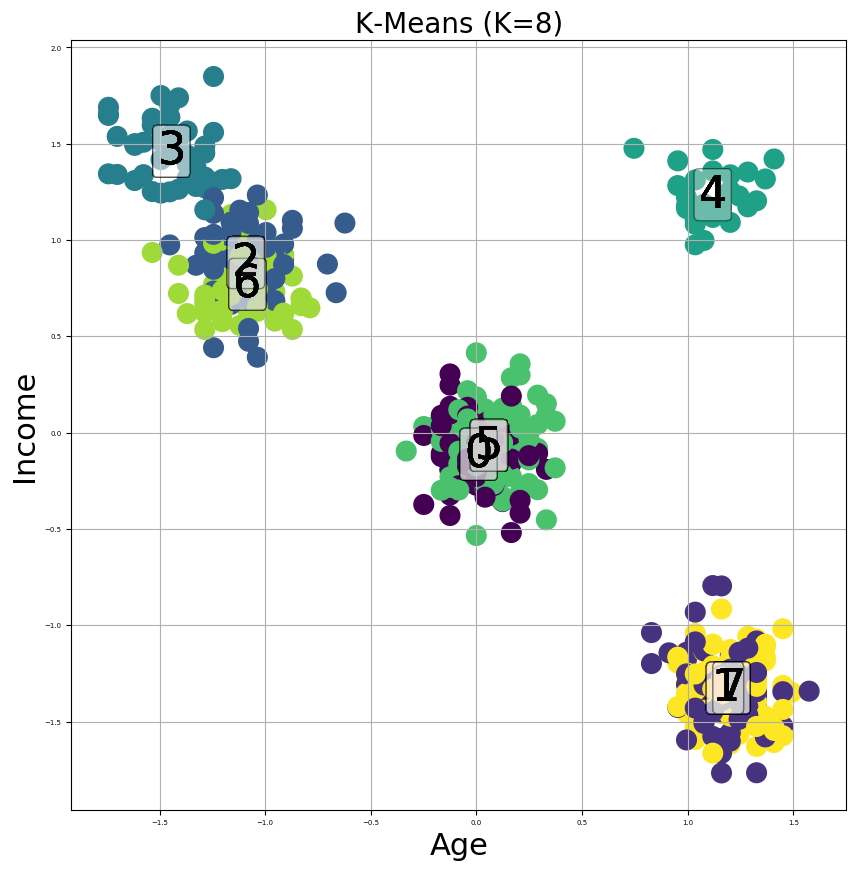

In [28]:
kmeans_arr = jewelry_cust_standard

for cluster_count in range (2,9):

    kmeans = KMeans(n_clusters=cluster_count,n_init=10,random_state=42) #try a cluster value    
    kmeans.fit(kmeans_arr)   

    plt.style.use('default');

    plt.figure(figsize=(10, 10));
    plt.grid(True);

    sc = plt.scatter(kmeans_arr.iloc[:, 0], kmeans_arr.iloc[:, 1], s=200, c=kmeans.labels_);
    plt.title("K-Means (K=" + str(cluster_count) + ")", fontsize=20);
    plt.xlabel('Age', fontsize=22);
    plt.ylabel('Income', fontsize=22);
    plt.xticks(fontsize=5);
    plt.yticks(fontsize=5);

    for label in kmeans.labels_:
        plt.text(x=kmeans.cluster_centers_[label, 0], y=kmeans.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02)); 